In [1]:
import pandas as pd

from montecarlo import Die, Game, Analyzer

### Scenario 1: A 2-headed coin

- Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
- Play a game of 1000 flips of 3 coins with all fair dice.
- Play a game of 1000 flips with 2 unfair dice and 1 fair die.
- For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
- Compute relative frequency as the number of jackpots over the total number of rolls.
- Show your results, comparing the two relative frequencies, in a simple bar chart.

In [2]:
fair_die = Die(['H','T']) # Fair coin
fair_die.roll_die()
fair_game = Game([fair_die, fair_die, fair_die])
game_num = 1000
fair_game.play_game(game_num)

analyzer = Analyzer(fair_game)
fair_freq = analyzer.jackpot() / game_num
fair_freq

0.246

In [3]:
fair_die_2 = Die(['H','T']) # Fair coin
fair_die_2.roll_die()

unfair_die_3 = Die(['H','T']) 
unfair_die_3.change_weight('H', 5.0)
unfair_die_3.roll_die()

unfair_die_4 = Die(['H','T']) 
unfair_die_4.change_weight('H', 5.0)
unfair_die_4.roll_die()

unfair_game = Game([fair_die_2, unfair_die_3, unfair_die_4])
game_num = 1000
unfair_game.play_game(game_num)

unfair_analyzer = Analyzer(unfair_game)
unfair_freq = unfair_analyzer.jackpot() / game_num
unfair_freq

0.362

([<matplotlib.axis.YTick at 0x7f341402af10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

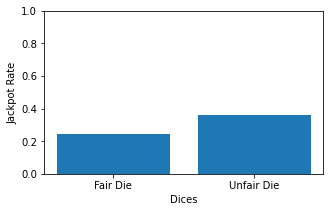

In [4]:
import matplotlib.pyplot as plt
import numpy as np

names = ['Fair Die', 'Unfair Die']
values = [fair_freq, unfair_freq]

plt.figure(figsize=(5,3))

plt.bar(names, values)
plt.ylabel("Jackpot Rate")
plt.xlabel("Dices")
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

### Scenario 2: A 6-sided die

- Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.
- Play a game of 10000 rolls with 5 fair dice.
- Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
- For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
- Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

### Case 1: 5 Fair Dice

In [5]:
fair = Die(['1','2','3','4','5','6'])
unfair_1 = Die(['1','2','3','4','5','6'])
unfair_2 = Die(['1','2','3','4','5','6'])
unfair_1.change_weight('6', 5.0)
unfair_2.change_weight('1', 5.0)

True

In [6]:
fair.roll_die()
game_1 = Game([fair, fair, fair, fair, fair])
game_num = 10000
game_1.play_game(game_num)

analyzer_1 = Analyzer(game_1)
freq_1 = analyzer_1.jackpot() / game_num
freq_1

0.0006

In [7]:
a = analyzer_1.combo()
top_combos = a.sort_values('Occurrence', ascending = False)[:10]
top_combos

,Combination,Occurrence
0,"[6, 2, 4, 5, 5]",7.0
2,"[2, 2, 6, 2, 3]",7.0
3,"[6, 6, 3, 6, 6]",7.0
1,"[5, 5, 4, 6, 5]",7.0
12,"[3, 4, 3, 4, 2]",6.0
19,"[3, 3, 4, 4, 2]",6.0
18,"[2, 5, 5, 1, 1]",6.0
17,"[4, 4, 6, 4, 6]",6.0
15,"[4, 1, 3, 4, 4]",6.0
14,"[3, 2, 5, 3, 4]",6.0


Text(0, 0.5, 'Occurrence')

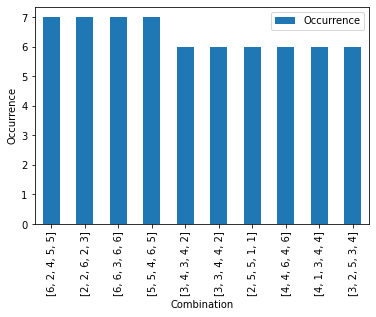

In [8]:
top_combos.plot.bar(x ='Combination', y = 'Occurrence')
plt.ylabel('Occurrence')

### Case 2: 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice

In [9]:
fair.roll_die()
unfair_1.roll_die()
unfair_2.roll_die()
game_2 = Game([fair, fair, unfair_1, unfair_1, unfair_2])
game_num = 10000
game_2.play_game(game_num)
analyzer_2 = Analyzer(game_2)
freq_2 = analyzer_2.jackpot() / game_num
freq_2

0.0008

In [10]:
b = analyzer_2.combo()
top_combos = b.sort_values('Occurrence', ascending = False)[:10]
top_combos

,Combination,Occurrence
0,"[3, 2, 6, 6, 1]",49.0
1,"[4, 5, 6, 6, 1]",49.0
2,"[6, 4, 6, 6, 1]",44.0
3,"[3, 5, 6, 6, 1]",44.0
4,"[3, 3, 6, 6, 1]",43.0
5,"[6, 1, 6, 6, 1]",41.0
6,"[6, 3, 6, 6, 1]",41.0
7,"[6, 6, 6, 6, 1]",40.0
8,"[3, 4, 6, 6, 1]",40.0
9,"[4, 2, 6, 6, 1]",39.0


Text(0, 0.5, 'Occurrence')

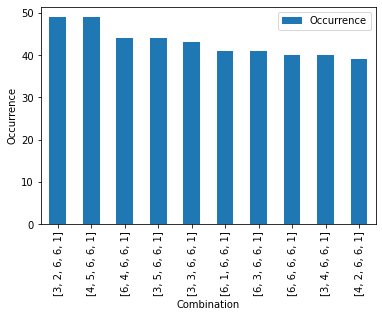

In [11]:
top_combos.plot.bar(x ='Combination', y = 'Occurrence')
plt.ylabel('Occurrence')

### Total Jacpot Rate Results for Both Cases

([<matplotlib.axis.YTick at 0x7f3412c308b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

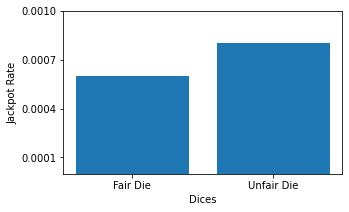

In [12]:
import matplotlib.pyplot as plt
import numpy as np

names = ['Fair Die', 'Unfair Die']
values = [freq_1, freq_2]

plt.figure(figsize=(5,3))

plt.bar(names, values)
plt.ylabel("Jackpot Rate")
plt.xlabel("Dices")
plt.yticks([0.0001, 0.0004, 0.0007, 0.001])

### Scendario 3: Letters of the Roman Alphabet 

- Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
- Play a game involving 5 of these dice with 1000 rolls.
- How many combos can you that look like actual English words?
- NOTE: "combo" here should really be permutation, which make sense for words. So just compute these from the result data you get from the Game object.
- Based on your eye count, what is the relative frequency of these words versus the rest?
- NOTE: You can do a few random sample to compute your estimate.
- The weights for the letters are in the Appendix to this document.

In [13]:
freqs = pd.read_csv('letter-freqs.csv', sep = '\t')
a_row = []
for ele in list(freqs.columns):
    if len(ele) > 2:
        ele = float(ele)
    a_row.append(ele)
freqs.loc[len(freqs)] = a_row
freqs.columns = ['letter', 'ratio']
freqs = freqs.sort_values(by=['letter'])
freqs.index = np.arange(len(freqs))
freqs = freqs.set_index('letter')
freq_dict = list(freqs.to_dict().values())[0]
freq_dict

{'A': 8.4966,
 'B': 2.072,
 'C': 4.5388,
 'D': 3.3844,
 'E': 11.1607,
 'F': 1.8121,
 'G': 2.4705,
 'H': 3.0034,
 'I': 7.5448,
 'J': 0.1965,
 'K': 1.1016,
 'L': 5.4893,
 'M': 3.0129,
 'N': 6.6544,
 'O': 7.1635,
 'P': 3.1671,
 'Q': 0.1962,
 'R': 7.5809,
 'S': 5.7351,
 'T': 6.9509,
 'U': 3.6308,
 'V': 1.0074,
 'W': 1.2899,
 'X': 0.2902,
 'Y': 1.7779,
 'Z': 0.2722}

In [14]:
from string import ascii_lowercase
alphabets = [c.upper() for c in ascii_lowercase]

In [15]:
alphabet_die = Die(alphabets)
for key in freq_dict:
    alphabet_die.change_weight(key, freq_dict[key])
alphabet_die.df[:5]

,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607


In [16]:
alphabet_die.roll_die()
fair_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game_num = 1000
fair_game.play_game(game_num)

analyzer = Analyzer(fair_game)

In [17]:
analyzer.jackpot()

0

In [18]:
alpha_combo = analyzer.combo()
alpha_combo

,Combination,Occurrence
0,"[G, N, X, S, S]",1.0
1,"[N, M, I, S, A]",1.0
2,"[Y, E, O, N, T]",1.0
3,"[I, E, E, A, T]",1.0
4,"[S, G, B, R, T]",1.0
...,...,...
995,"[C, D, N, O, Y]",1.0
996,"[M, C, E, A, M]",1.0
997,"[R, U, N, E, I]",1.0
998,"[I, S, T, O, T]",1.0


In [19]:
eyeballs = alpha_combo['Combination'][:30]
eyeballs

0     [G, N, X, S, S]
1     [N, M, I, S, A]
2     [Y, E, O, N, T]
3     [I, E, E, A, T]
4     [S, G, B, R, T]
5     [A, A, N, O, A]
6     [U, U, L, U, H]
7     [T, F, C, E, S]
8     [D, T, O, T, S]
9     [V, I, W, A, I]
10    [O, O, T, B, U]
11    [N, F, S, A, G]
12    [E, A, E, N, O]
13    [R, O, S, A, R]
14    [A, C, N, O, E]
15    [K, E, E, S, R]
16    [I, C, I, I, S]
17    [I, R, P, I, E]
18    [E, D, O, C, I]
19    [B, P, L, Z, W]
20    [N, M, I, L, N]
21    [D, I, P, E, C]
22    [N, T, H, R, G]
23    [S, S, T, T, W]
24    [R, A, A, G, U]
25    [P, Z, I, E, I]
26    [T, C, T, U, N]
27    [S, L, W, R, R]
28    [O, O, A, N, A]
29    [N, T, E, L, D]
Name: Combination, dtype: object

### Result
: Apparantely, none of the combinations from my 30 samples look like actual words.